In [1]:
import numpy as np
import pandas
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
import sklearn.metrics as met

In [2]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data = pandas.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data= data.sample(n=14000000, replace=True,random_state=40)
data.head()
data.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07
mean,5.073219e+01,6.357429e+00,6.837783e-01,3.140410e-01,3.621695e+01,5.389981e+00,3.768815e+02,7.640353e+02,4.935512e+02,8.394123e+02,8.845017e+02,1.940834e+03,5.011412e+02,1.059992e+03,1.304858e+02,5.316259e+02,3.757345e+02,2.618125e+03,4.513194e+02,8.835131e+03
std,1.246466e+01,1.102051e+00,6.697911e-01,5.978696e-01,1.380090e+01,6.532381e+00,5.882199e+01,2.051671e+02,8.871042e+01,6.999113e+01,1.485530e+02,7.346782e+02,1.266492e+02,2.257150e+02,4.134599e+01,1.636271e+02,7.080464e+01,9.910303e+02,8.658066e+01,2.038253e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055997e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854768e+02,7.579525e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259398e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421904e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466598e+02,6.566271e+02,4.286915e+02,3.377095e+03,5.089412e+02,9.240019e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.665257e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [4]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [5]:
data = data.dropna()

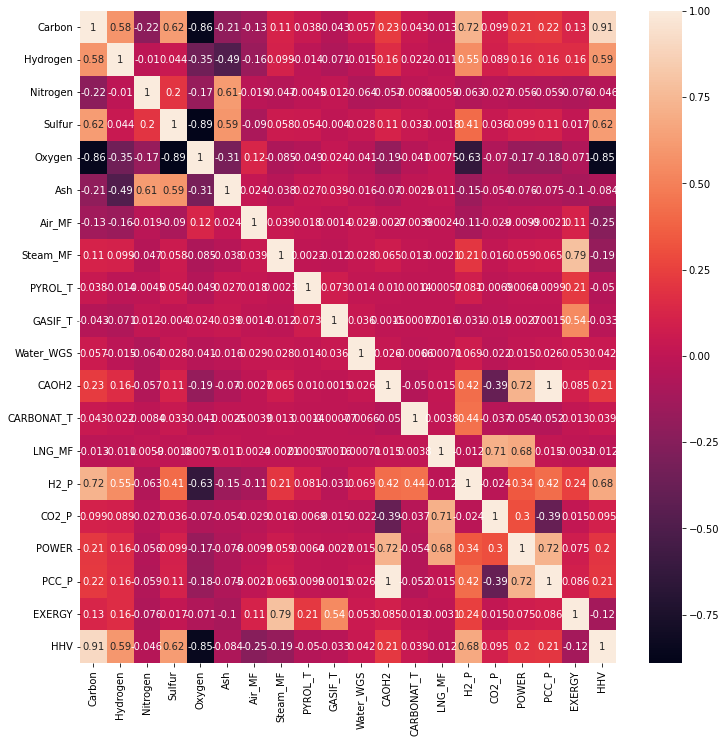

In [6]:
corr_matrix = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20,random_state=40)
train, valid=train_test_split(train, test_size=0.125, random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06
mean,5.073403e+01,6.357678e+00,6.836326e-01,3.139644e-01,3.621748e+01,5.388165e+00,3.768833e+02,7.640751e+02,4.935519e+02,8.394005e+02,8.845259e+02,1.940772e+03,5.011099e+02,1.060035e+03,1.304881e+02,5.316594e+02,3.757400e+02,2.618043e+03,4.513303e+02,8.835112e+03
std,1.246388e+01,1.101738e+00,6.697436e-01,5.978483e-01,1.380155e+01,6.530796e+00,5.881352e+01,2.051668e+02,8.871008e+01,6.998584e+01,1.485544e+02,7.347840e+02,1.266483e+02,2.257114e+02,4.134890e+01,1.636060e+02,7.081412e+01,9.911687e+02,8.658797e+01,2.038003e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708610e+02,3.709994e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055915e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854768e+02,7.579525e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259394e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421904e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466632e+02,6.566271e+02,4.287083e+02,3.377095e+03,5.089730e+02,9.239615e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.665257e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06
mean,5.073223e+01,6.357268e+00,6.842195e-01,3.142033e-01,3.621320e+01,5.390684e+00,3.769029e+02,7.639171e+02,4.935451e+02,8.394322e+02,8.843573e+02,1.941200e+03,5.012421e+02,1.059917e+03,1.304891e+02,5.316005e+02,3.757498e+02,2.618612e+03,4.512885e+02,8.835861e+03
std,1.246673e+01,1.102640e+00,6.694934e-01,5.978500e-01,1.380047e+01,6.528400e+00,5.883965e+01,2.051812e+02,8.871853e+01,7.000108e+01,1.485141e+02,7.341667e+02,1.266764e+02,2.257368e+02,4.132918e+01,1.636401e+02,7.076834e+01,9.903449e+02,8.656169e+01,2.039051e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.460580e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056363e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.855058e+02,7.579628e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259498e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421768e+02,8.350085e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466901e+02,6.566271e+02,4.287245e+02,3.377095e+03,5.089044e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.061818e+02,7.663591e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [10]:
valid.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06
mean,5.071924e+01,6.356007e+00,6.839160e-01,3.142528e-01,3.622074e+01,5.401283e+00,3.768264e+02,7.639938e+02,4.935586e+02,8.394549e+02,8.846217e+02,1.940535e+03,5.011583e+02,1.059848e+03,1.304627e+02,5.314424e+02,3.756655e+02,2.617725e+03,4.513050e+02,8.833812e+03
std,1.246594e+01,1.103060e+00,6.707189e-01,5.980578e-01,1.379713e+01,6.551405e+00,5.884598e+01,2.051413e+02,8.869669e+01,7.000826e+01,1.486208e+02,7.349612e+02,1.266009e+02,2.256965e+02,4.135923e+01,1.637485e+02,7.081088e+01,9.914325e+02,8.656747e+01,2.038413e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,7.000000e+02,3.462862e+01,5.058682e-03,1.708694e+02,3.711397e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055815e+02,4.371646e+02,3.257929e+02,1.688547e+03,3.854212e+02,7.578538e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259206e+02,5.468958e+02,3.754125e+02,2.566592e+03,4.421904e+02,8.349276e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.465849e+02,6.566271e+02,4.285008e+02,3.377095e+03,5.089867e+02,9.240284e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.400000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.663587e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [11]:
col_target=['CO2_P']
col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T", "LNG_MF"]

In [12]:
train_feature = train[col_randoms ]
train_target = train[col_target]
train_feature.shape
train_target.shape

(9800000, 1)

In [13]:
val_feature = valid[col_randoms]
val_target = valid[col_target]

In [14]:
test_feature = test[col_randoms]
test_target = test[col_target]

In [15]:
train_feature.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
count,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06
mean,5.073403e+01,6.357678e+00,6.836326e-01,3.139644e-01,3.621748e+01,5.388165e+00,3.768833e+02,7.640751e+02,4.935519e+02,8.394005e+02,8.845259e+02,1.940772e+03,5.011099e+02,1.060035e+03
std,1.246388e+01,1.101738e+00,6.697436e-01,5.978483e-01,1.380155e+01,6.530796e+00,5.881352e+01,2.051668e+02,8.871008e+01,6.998584e+01,1.485544e+02,7.347840e+02,1.266483e+02,2.257114e+02
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03


In [16]:
test_target.describe()

,CO2_P
count,2.800000e+06
mean,5.316005e+02
std,1.636401e+02
min,0.000000e+00
25%,4.371646e+02
50%,5.468958e+02
75%,6.566271e+02
max,7.663591e+02


In [17]:
#train_X = train[feature_vars.columns]
#train_y = train[target_vars.columns]
#train_X.shape
#test_X = test[feature_vars.columns]
#test_y = test[target_vars.columns]
#test_X.shape
#valid_X = valid[feature_vars.columns]
#valid_y = valid[target_vars.columns]
#valid_X.shape

In [18]:
sc_train = pd.DataFrame(columns=train_feature.columns)
sc_train[sc_train.columns] = sc.fit_transform(train_feature)
sc_test= pd.DataFrame(columns=test_feature.columns , index=test_feature.index)
sc_test[sc_test.columns] = sc.fit_transform(test_feature)
sc_valid=pd.DataFrame(columns=val_feature.columns, index=val_feature.index)
sc_valid[sc_valid.columns]=sc.fit_transform(val_feature)

In [19]:
sc_valid.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
count,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06
mean,1.826541e-15,-5.754178e-16,2.781673e-16,1.517618e-16,-3.378529e-16,-1.831779e-16,-6.673011e-17,2.537399e-16,2.340832e-16,6.776345e-16,3.828607e-16,-8.882292e-17,4.941317e-17,-3.589256e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.754320e+00,-2.420999e+00,-1.019677e+00,-5.254558e-01,-2.396205e+00,-7.939190e-01,-1.305550e+00,-1.286888e+00,-1.393047e+00,-1.991978e+00,-1.847801e+00,-2.221254e+00,-1.509930e+00,-1.594387e+00
25%,-3.906036e-01,-4.587302e-01,-4.978482e-01,-5.254558e-01,6.530055e-02,-3.863727e-01,-7.107770e-01,-9.456595e-01,-9.420718e-01,-9.206753e-01,-9.058066e-01,-9.395535e-01,-1.004404e+00,-7.082412e-01
50%,-2.261554e-01,-2.048909e-01,-4.233013e-01,-5.254558e-01,4.188742e-01,-3.360018e-01,-1.160038e-01,1.267724e-01,-4.012127e-02,1.506272e-01,-1.993105e-01,-5.515276e-02,6.648389e-03,1.779049e-01
75%,-4.004821e-02,9.736488e-01,8.887244e-01,-3.415270e-01,6.218149e-01,2.592905e-01,1.073542e+00,6.629883e-01,6.363416e-01,8.648288e-01,4.399003e-01,7.612172e-01,1.017700e+00,1.064051e+00
max,2.370521e+00,1.609335e+00,4.475176e+00,2.506861e+00,6.674766e-01,5.510074e+00,1.668316e+00,1.637926e+00,1.651036e+00,1.936131e+00,2.122034e+00,1.985772e+00,1.523226e+00,1.507124e+00


In [20]:
test_target.describe()

,CO2_P
count,2.800000e+06
mean,5.316005e+02
std,1.636401e+02
min,0.000000e+00
25%,4.371646e+02
50%,5.468958e+02
75%,6.566271e+02
max,7.663591e+02


In [21]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#train = train[list(train_X.columns.values) + col_target ]
#test = test[list(test_X.columns.values) + col_target ]
###
#valid=valid[list(valid_X.columns.values)+ col_target]
###
#sc_train = pd.DataFrame(columns=train.columns , index=train.index)
#sc_train[sc_train.columns] = sc.fit_transform(train)
#sc_test= pd.DataFrame(columns=test.columns , index=test.index)
#sc_test[sc_test.columns] = sc.fit_transform(test)
#
#sc_valid=pd.DataFrame(columns=valid.columns, index=valid.index)
#sc_valid[sc_valid.columns]=sc.fit_transform(valid)

In [22]:
#train_X =  sc_train.drop(['H2_P'] , axis=1)
#test_X =  sc_test.drop(['H2_P'] , axis=1)
#valid_X=sc_valid.drop(['H2_P'] , axis=1)

In [23]:

#x=train.values[:,0:13]
#y=train.values[:,14]
#x -= np.min(x)
#x/= (np.max(x) - np.min(x))
##y -= np.min(y)
##y/= (np.max(y) - np.min(y))
#y

In [24]:
model = Sequential()
model.add(Dense(40, input_dim=14, kernel_initializer= 'normal' , activation='relu'))
model.add(Dense(40, kernel_initializer= 'normal' , activation= 'relu' ))
model.add(Dense(14, kernel_initializer= 'normal' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'normal'))
#

In [25]:
model.compile(loss= 'mean_squared_error' , optimizer= 'adam')

In [26]:
#اگر کار نکرد و چیزی نشون نداد خپمساوی را بردار
# epochs_hist= build_ann()
epochs_hist=model.fit(sc_train, train_target, epochs=20, batch_size=50, validation_data=(sc_valid,val_target))

Epoch 1/20
196000/196000 [==============================] - 231s 1ms/step - loss: 718.4691 - val_loss: 60.4236
Epoch 2/20
196000/196000 [==============================] - 242s 1ms/step - loss: 36.4164 - val_loss: 33.8729
Epoch 3/20
196000/196000 [==============================] - 211s 1ms/step - loss: 23.4451 - val_loss: 16.7599
Epoch 4/20
196000/196000 [==============================] - 210s 1ms/step - loss: 16.5883 - val_loss: 7.9035
Epoch 5/20
196000/196000 [==============================] - 211s 1ms/step - loss: 10.7762 - val_loss: 7.5771
Epoch 6/20
196000/196000 [==============================] - 215s 1ms/step - loss: 9.5735 - val_loss: 8.2522
Epoch 7/20
196000/196000 [==============================] - 233s 1ms/step - loss: 8.7406 - val_loss: 16.9715
Epoch 8/20
196000/196000 [==============================] - 238s 1ms/step - loss: 8.1512 - val_loss: 6.2364
Epoch 9/20
196000/196000 [==============================] - 242s 1ms/step - loss: 7.6502 - val_loss: 6.5121
Epoch 10/20
196000

In [27]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

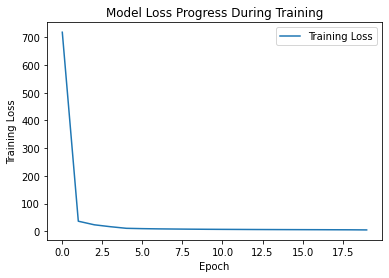

In [28]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [29]:
result = model.evaluate(sc_test, test_target)


87500/87500 [==============================] - 118s 1ms/step - loss: 4.9478


In [30]:
y_pred = model.predict(sc_test)
print(y_pred)

[[479.29083]
 [711.80725]
 [435.62833]
 ...
 [412.2613 ]
 [381.74973]
 [381.54846]]


In [31]:
results = pd.DataFrame(columns=["model", "r2", "mae", "rmse", "potential"])

In [32]:

def get_regression_metrics(y_pred):
    global y_test
    return (
        met.r2_score(test_target, y_pred),
        met.mean_absolute_error(test_target, y_pred),
        np.sqrt(met.mean_squared_error(test_target, y_pred)))


def print_regression_metrics(y_pred, model_name, potential):
    global results
    
    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred)
    print("R2 =   {0:.1f}% \nMAE =  {1:.2f} \nRMSE = {2:.2f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results["model"]==model_name).any()):
        rdict = {
            "model": model_name,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential}
        results = results.append(rdict, ignore_index=True)
        
    else:
        idx = results.index[results['model'] == model_name].tolist()[0]
        results.at[idx, "r2"] = r2
        results.at[idx, "mae"] = mae
        results.at[idx, "rmse"] = rmse
        results.at[idx, "potential"] = potential

In [33]:
y_pred_annk = model.predict(sc_test)

print_regression_metrics(y_pred_annk, "epochs_hist", "Major")
#utils.plot_regression_results(test_y, y_pred_annk, "epochs_hist")

R2 =   100.0% 
MAE =  1.24 
RMSE = 2.22


C:\Users\mostafa\AppData\Local\Temp\ipykernel_13900\4048928140.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rdict, ignore_index=True)


In [34]:
# save results to CSV
#dt = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#results.to_csv("results/results_"+dt+".csv")

In [35]:
#fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
#
#results.plot(x="model", y="r2", kind="barh", ax=ax1, title="$R^2$", legend=False)
#results.plot(x="model", y="mae", kind="barh", ax=ax2, title="MAE", legend=False)
#results.plot(x="model", y="rmse", kind="barh", ax=ax3, title="RMSE", legend=False)
#for ax in [ax1, ax2, ax3]:
#    ax.set_ylabel("")
#
#plt.tight_layout()
#plt.savefig("plots/results_bar.pdf", bbox_inches="tight")